<a href="https://colab.research.google.com/github/shaficse/Visualization-of-the-output-of-each-CNN-layers-for-input-image/blob/main/visualization_output_of_cnn_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Convolutional neural networks are highly effective for image classification and recognition tasks, as they employ a variety of filters in each layer to learn features from the training images. The features that are learned at each convolutional layer tend to vary significantly. It has been observed that the earlier layers tend to capture low-level features such as edges, orientation, and colors in the image. As the number of layers increases, the CNN is able to capture more high-level features, which aid in distinguishing between different classes of images. To better understand how convolutional neural networks learn spatial and temporal dependencies in images, it is possible to visualize the different features that are captured at each layer.





In [1]:
#ignore this section and use your local path if you use your owndata from local storage
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd drive/My Drive/

/content/drive/My Drive


To experiment the visualization of the output of CNN layers, We will consider a Binary Classification (dog and cat image classification) Task where we build a convolutional neural network and then add a classifier on top of the network.

In [12]:
# Step-1: Loading a dataset and preprocessing the data

from keras.preprocessing.image import ImageDataGenerator

train_data_gen = ImageDataGenerator(rescale=1./255)
val_data_gen = ImageDataGenerator(rescale=1./255)

train_generator = train_data_gen.flow_from_directory("training-data/cat_dog/train", target_size=(150,150), batch_size=20, class_mode="binary")
validation_generator = val_data_gen.flow_from_directory("training-data/cat_dog/test", target_size=(150,150), batch_size=20, class_mode="binary")

Found 6 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


In [13]:
#step-2: Define the model architecture
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu' ))
model.add(layers.MaxPool2D( (2,2) ) )

model.add(layers.Conv2D(128, (3,3), activation='relu' ))
model.add(layers.MaxPool2D( (2,2) ) )

model.add(layers.Conv2D(128, (3,3), activation='relu' ))
model.add(layers.MaxPool2D( (2,2) ) )

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [14]:
model.summary()  # paramer of each layer =  weight [32(num of filters)*3*3(filter size)* 3(channel)] + baise[num of filters]

# output shape ( 150-3+1, 150-3+1, 32)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [15]:
#step-3: Compiling and training the model
from tensorflow.keras.optimizers import RMSprop

model.compile(loss ="binary_crossentropy", optimizer = RMSprop(lr = 0.001), metrics =['accuracy'])

In [16]:
history = model.fit_generator(train_generator, \
                              steps_per_epoch=100, epochs=2, validation_data=validation_generator, validation_steps= 50)



Epoch 1/2


<ipython-input-16-08cd33dfa3ee>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, \


  1/100 [..............................] - ETA: 2:50 - loss: 0.6962 - accuracy: 0.5000

100/100 [==============================] - 3s 14ms/step - loss: 0.6962 - accuracy: 0.5000 - val_loss: 0.7066 - val_accuracy: 0.3333


(1, 150, 150, 3)


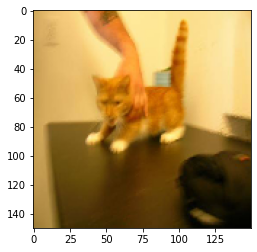

In [23]:
import tensorflow as tf
from tensorflow.keras.utils import img_to_array
import numpy as np

# Pre-processing the image
img = tf.keras.utils.load_img("training-data/cat_dog/test/cat/cat.0.jpg", target_size = (150, 150))
img_tensor = img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor = img_tensor / 255.

# Print image tensor shape
print(img_tensor.shape)

# Print image
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()


1/1 [==============================] - 0s 153ms/step
Layer1 & Channel 1
Layer1 & Channel 2
Layer1 & Channel 3
Layer1 & Channel 4
Layer1 & Channel 5
Layer1 & Channel 6
Layer1 & Channel 7
Layer1 & Channel 8
Layer1 & Channel 9
Layer1 & Channel 10
Layer1 & Channel 11
Layer1 & Channel 12
Layer1 & Channel 13
Layer1 & Channel 14
Layer1 & Channel 15
Layer1 & Channel 16
Layer2 & Channel 1
Layer2 & Channel 2
Layer2 & Channel 3
Layer2 & Channel 4
Layer2 & Channel 5
Layer2 & Channel 6
Layer2 & Channel 7
Layer2 & Channel 8
Layer2 & Channel 9
Layer2 & Channel 10
Layer2 & Channel 11
Layer2 & Channel 12
Layer2 & Channel 13


<ipython-input-45-498b998720dd>:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.matshow(first_layer_activation[0, :, :, j], cmap ='viridis')


Layer2 & Channel 14
Layer2 & Channel 15
Layer2 & Channel 16
Layer3 & Channel 1
Layer3 & Channel 2
Layer3 & Channel 3
Layer3 & Channel 4
Layer3 & Channel 5
Layer3 & Channel 6
Layer3 & Channel 7
Layer3 & Channel 8
Layer3 & Channel 9
Layer3 & Channel 10
Layer3 & Channel 11
Layer3 & Channel 12
Layer3 & Channel 13
Layer3 & Channel 14
Layer3 & Channel 15
Layer3 & Channel 16
Layer4 & Channel 1
Layer4 & Channel 2
Layer4 & Channel 3
Layer4 & Channel 4
Layer4 & Channel 5
Layer4 & Channel 6
Layer4 & Channel 7
Layer4 & Channel 8
Layer4 & Channel 9
Layer4 & Channel 10
Layer4 & Channel 11
Layer4 & Channel 12
Layer4 & Channel 13
Layer4 & Channel 14
Layer4 & Channel 15
Layer4 & Channel 16
Layer5 & Channel 1
Layer5 & Channel 2
Layer5 & Channel 3
Layer5 & Channel 4
Layer5 & Channel 5
Layer5 & Channel 6
Layer5 & Channel 7
Layer5 & Channel 8
Layer5 & Channel 9
Layer5 & Channel 10
Layer5 & Channel 11
Layer5 & Channel 12
Layer5 & Channel 13
Layer5 & Channel 14
Layer5 & Channel 15
Layer5 & Channel 16
Layer6 

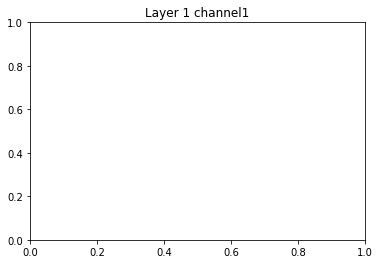

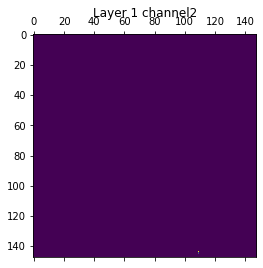

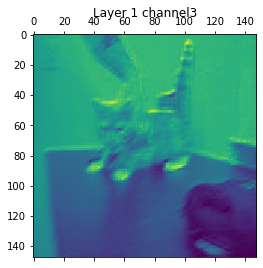

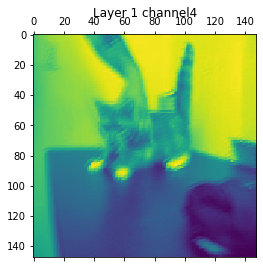

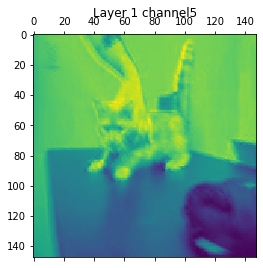

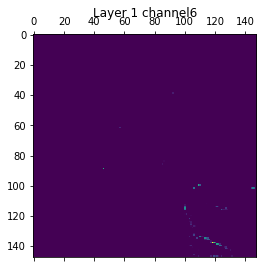

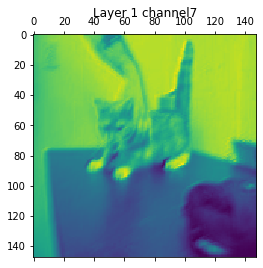

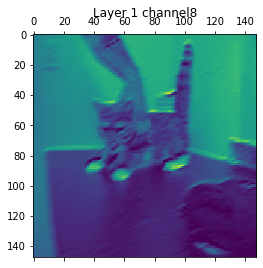

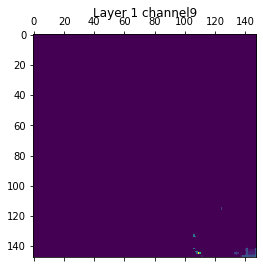

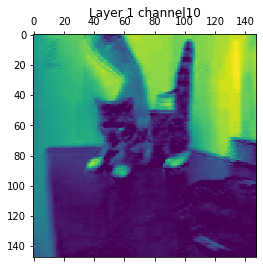

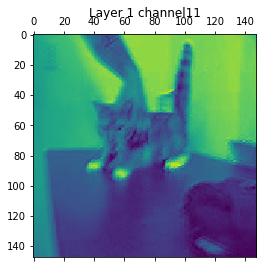

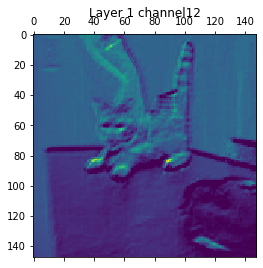

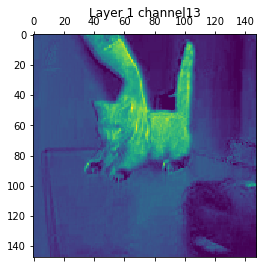

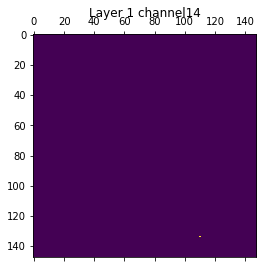

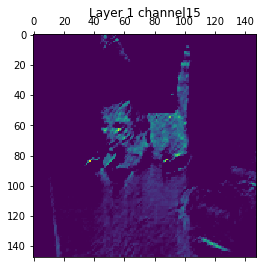

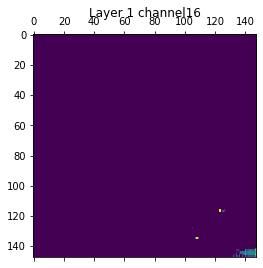

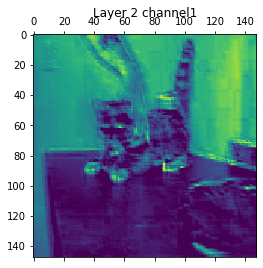

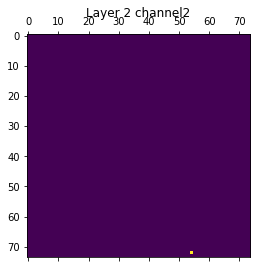

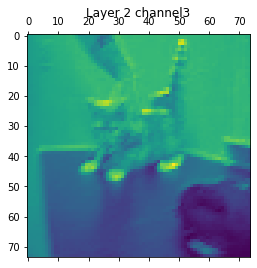

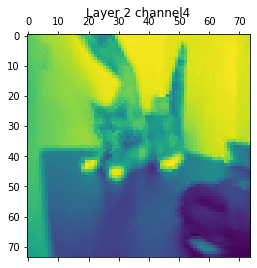

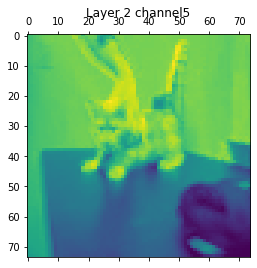

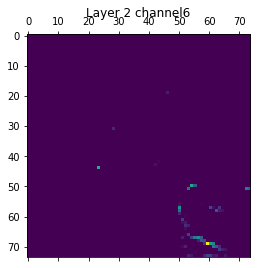

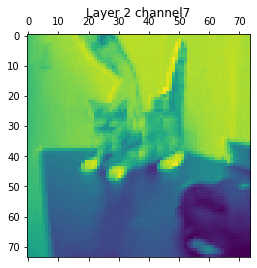

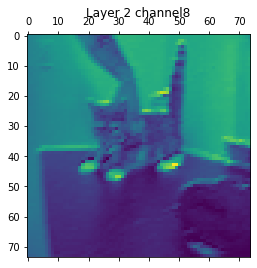

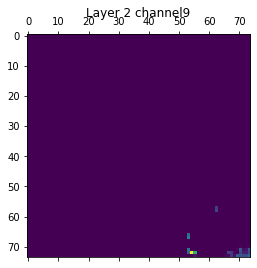

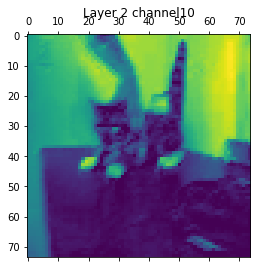

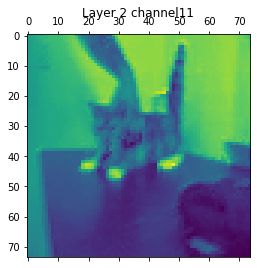

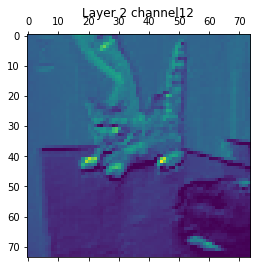

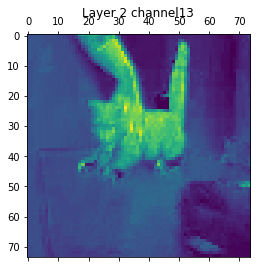

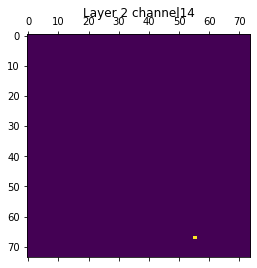

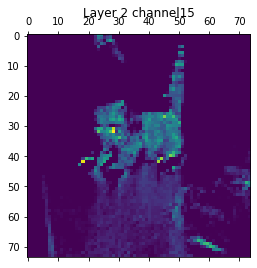

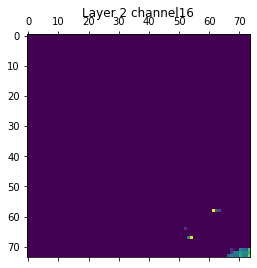

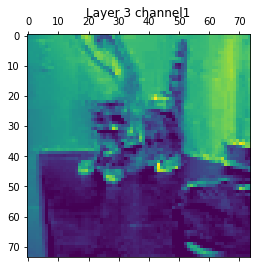

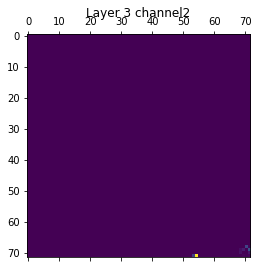

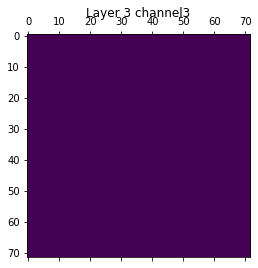

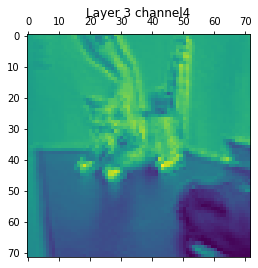

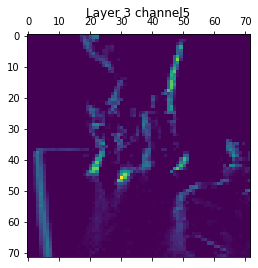

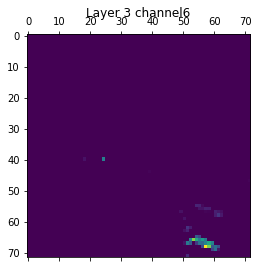

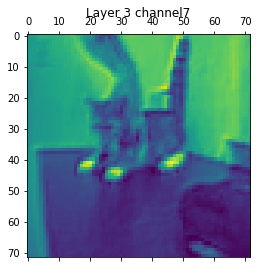

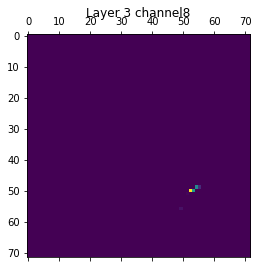

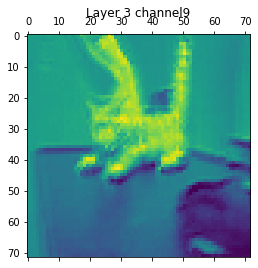

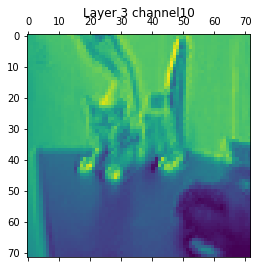

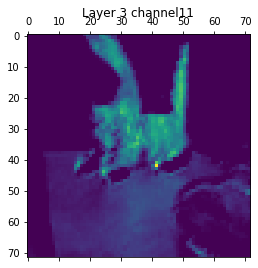

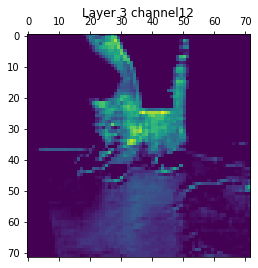

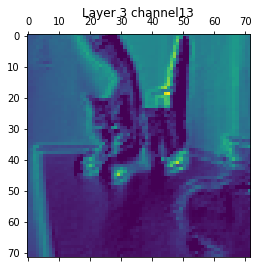

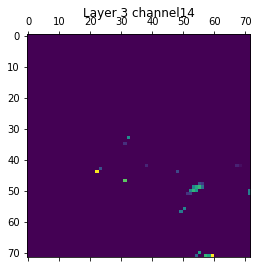

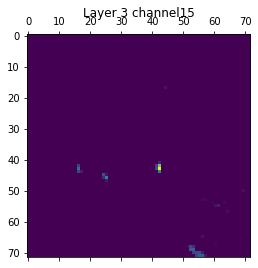

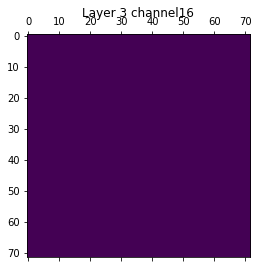

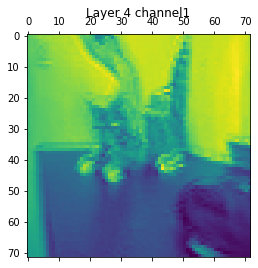

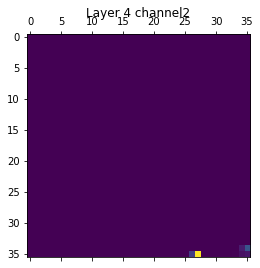

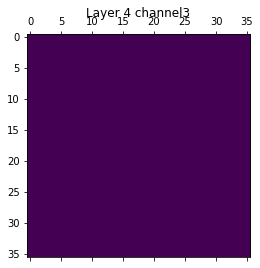

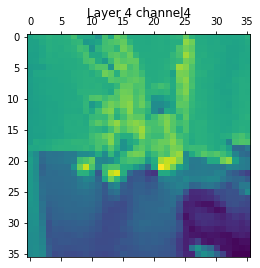

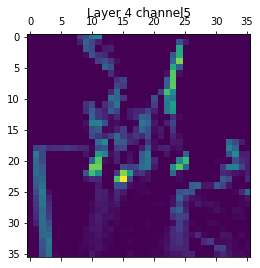

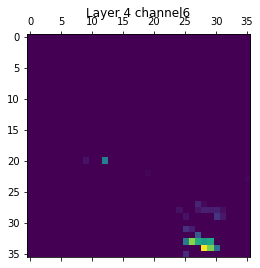

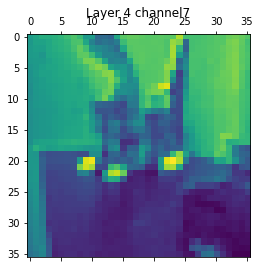

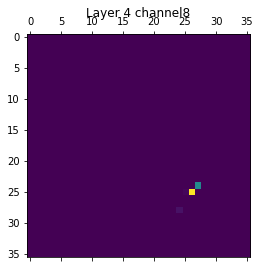

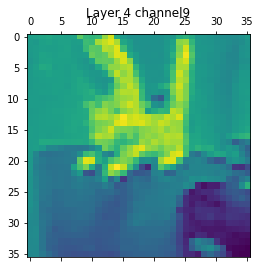

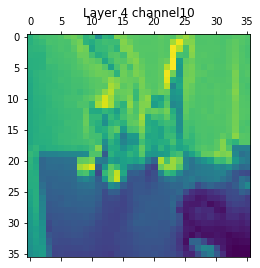

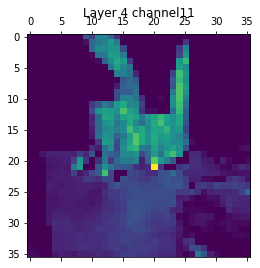

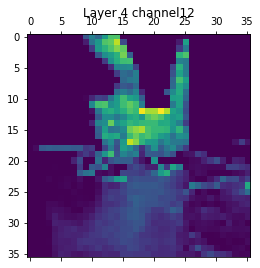

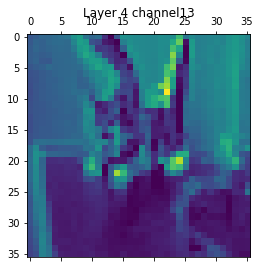

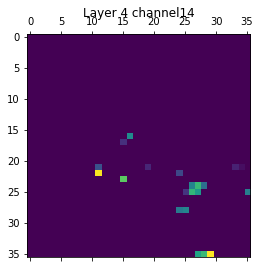

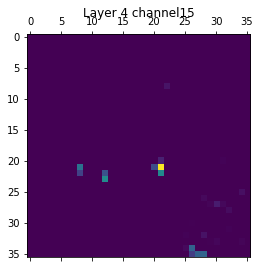

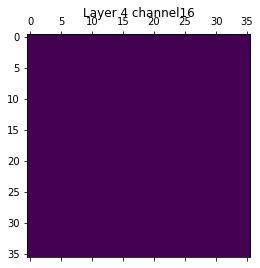

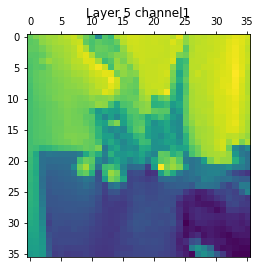

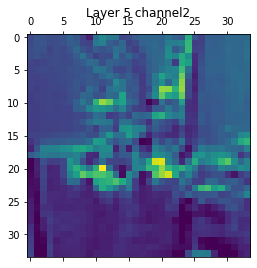

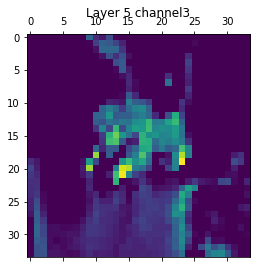

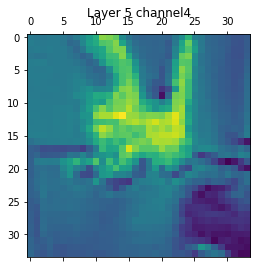

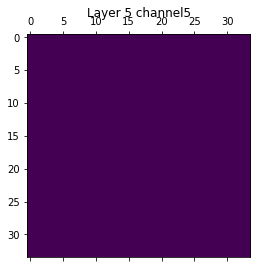

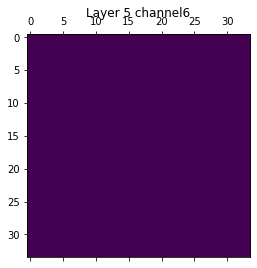

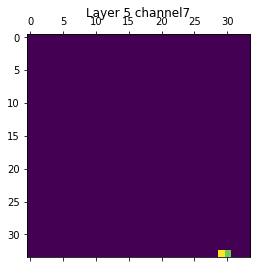

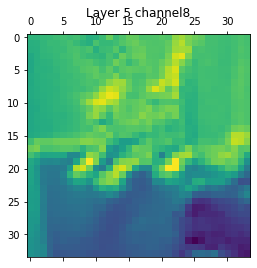

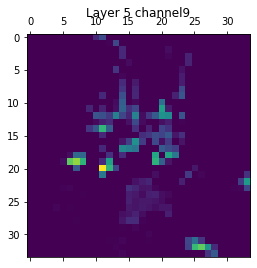

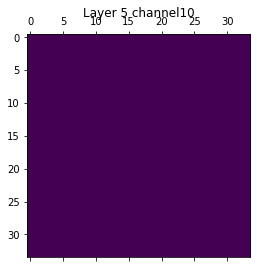

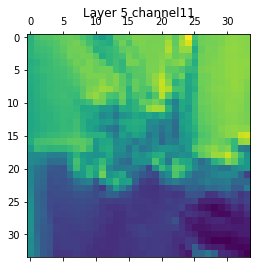

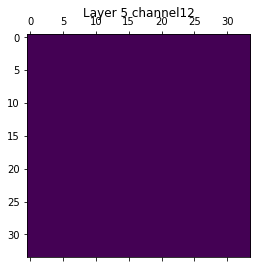

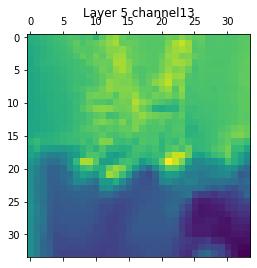

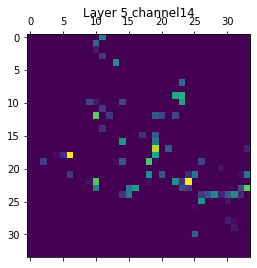

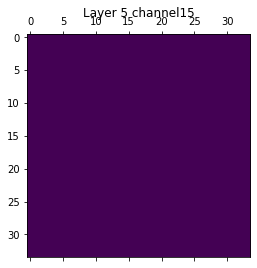

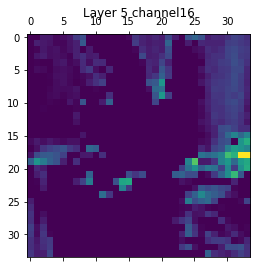

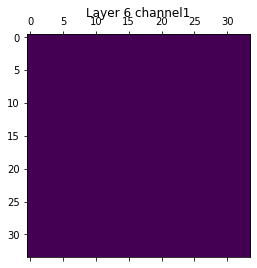

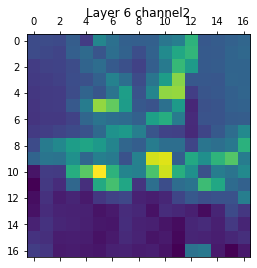

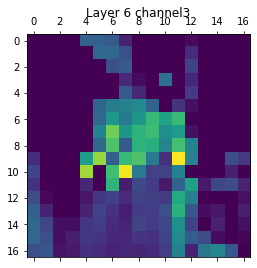

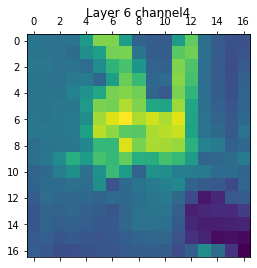

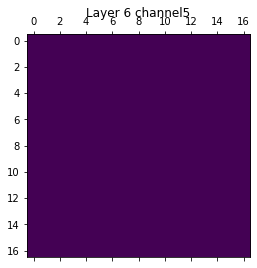

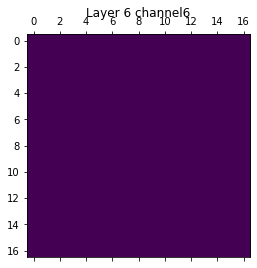

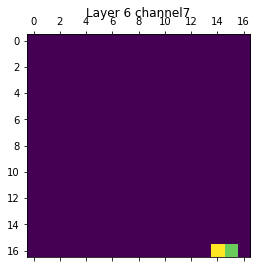

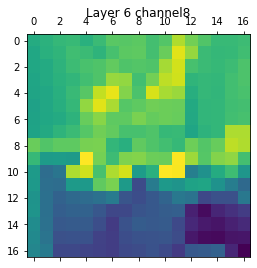

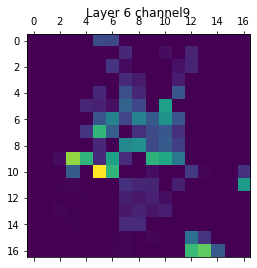

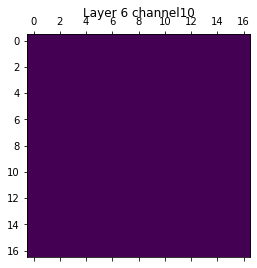

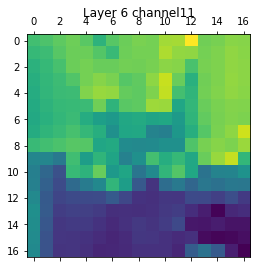

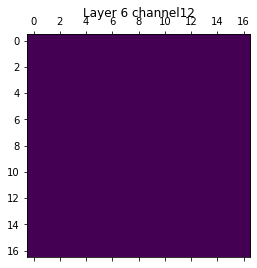

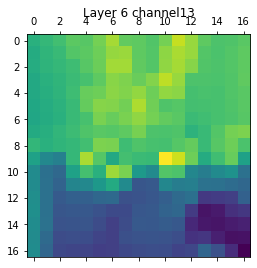

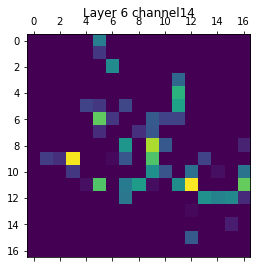

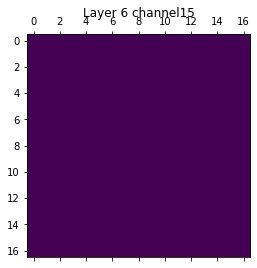

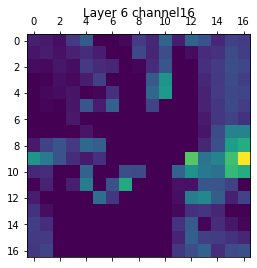

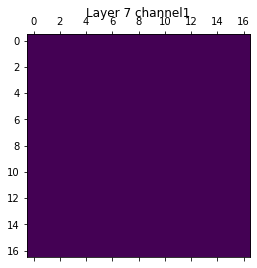

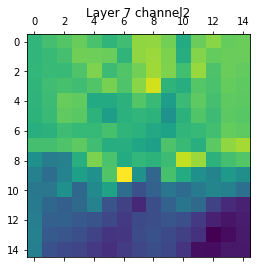

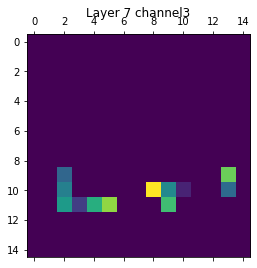

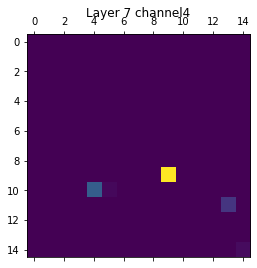

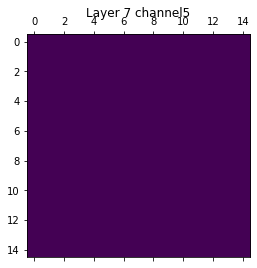

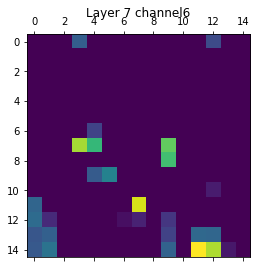

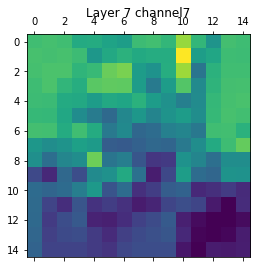

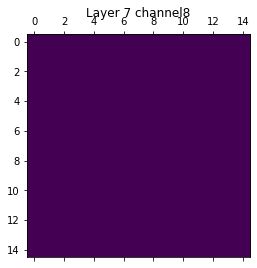

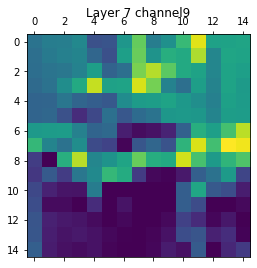

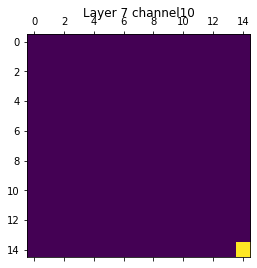

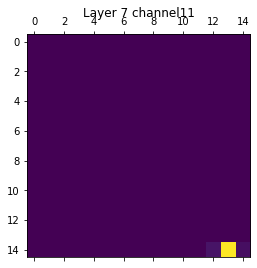

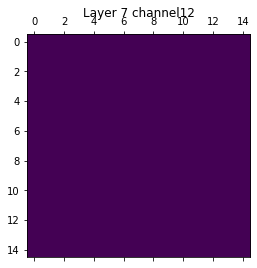

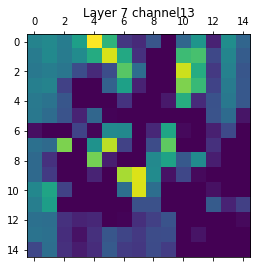

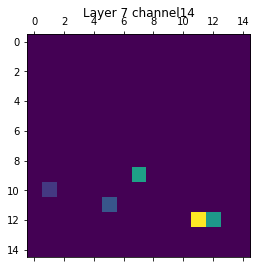

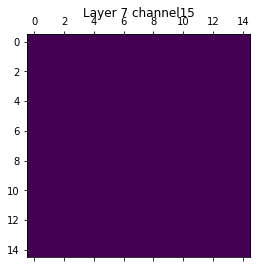

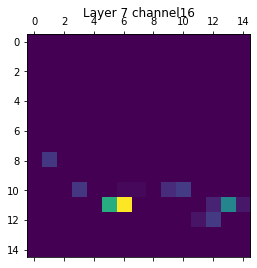

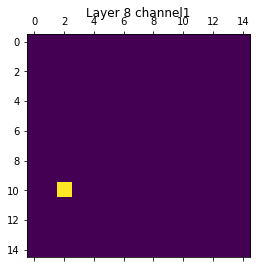

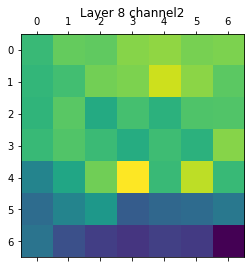

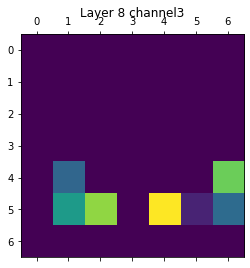

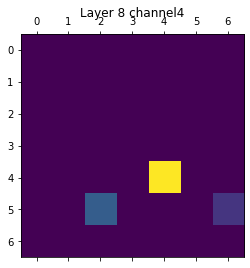

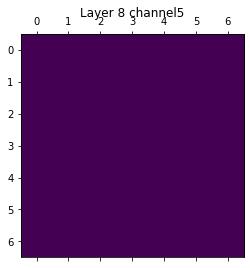

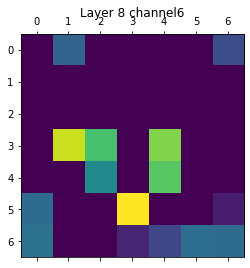

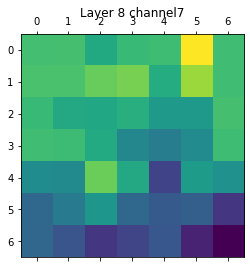

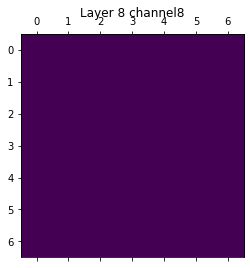

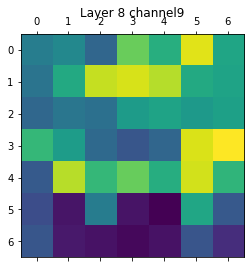

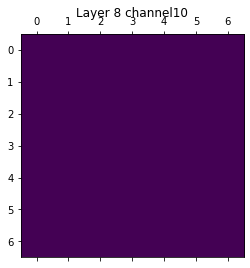

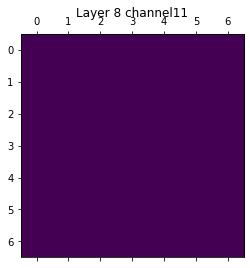

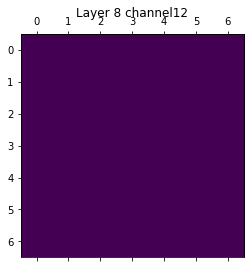

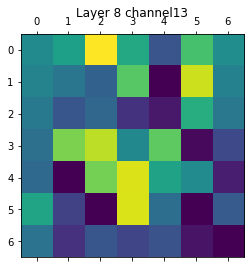

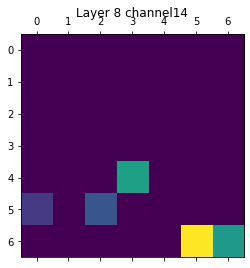

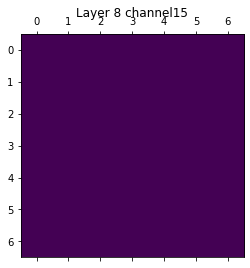

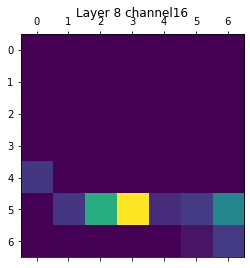

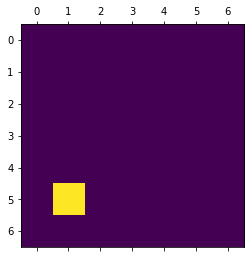

In [45]:
# Outputs of the 8 layers, which include conv2D and max pooling layers
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs = model.input, outputs = layer_outputs)
activations = activation_model.predict(img_tensor)

# # Getting Activations of first layer
# first_layer_activation = activations[7]

# # shape of first layer activation
# print(first_layer_activation.shape)

# # 6th channel of the image after first layer of convolution is applied
# plt.matshow(first_layer_activation[0, :, :, 6], cmap ='viridis')

# # 15th channel of the image after first layer of convolution is applied
# plt.matshow(first_layer_activation[0, :, :, 15], cmap ='viridis')

# # 15th channel of the image after first layer of convolution is applied
# plt.matshow(first_layer_activation[0, :, :, 15], cmap ='viridis')

for i, layer_act in enumerate(activations):
    first_layer_activation = activations[i]
    for j in range(16):
      print("Layer{} & Channel {}".format(i+1,j+1))
      plt.title(f'Layer {i+1} channel{j+1}')
      plt.matshow(first_layer_activation[0, :, :, j], cmap ='viridis')


In [26]:
layer_names = []

for layer in model.layers[:8]:
  layer_names.append(layer.name)
  print(layer_names)


['conv2d_4']
['conv2d_4', 'max_pooling2d_4']
['conv2d_4', 'max_pooling2d_4', 'conv2d_5']
['conv2d_4', 'max_pooling2d_4', 'conv2d_5', 'max_pooling2d_5']
['conv2d_4', 'max_pooling2d_4', 'conv2d_5', 'max_pooling2d_5', 'conv2d_6']
['conv2d_4', 'max_pooling2d_4', 'conv2d_5', 'max_pooling2d_5', 'conv2d_6', 'max_pooling2d_6']
['conv2d_4', 'max_pooling2d_4', 'conv2d_5', 'max_pooling2d_5', 'conv2d_6', 'max_pooling2d_6', 'conv2d_7']
['conv2d_4', 'max_pooling2d_4', 'conv2d_5', 'max_pooling2d_5', 'conv2d_6', 'max_pooling2d_6', 'conv2d_7', 'max_pooling2d_7']


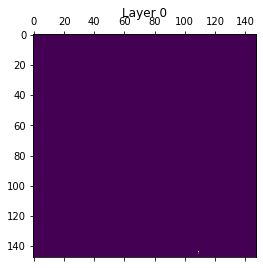

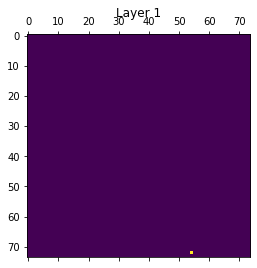

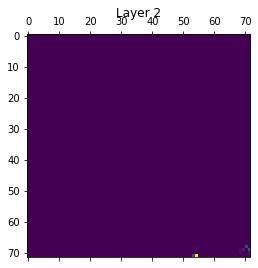

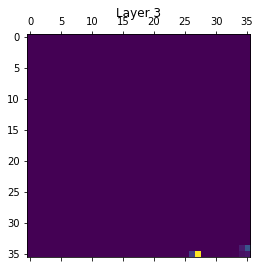

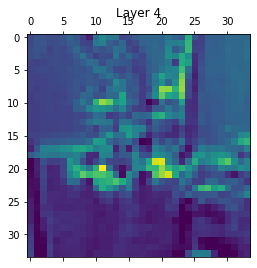

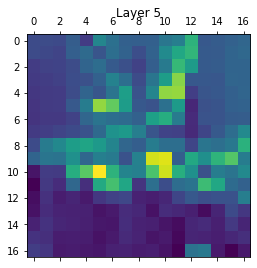

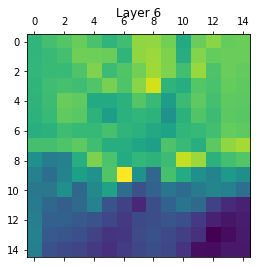

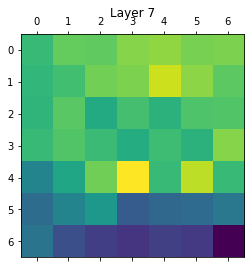

In [43]:
# Plot the feature maps for each layer
for i, activation in enumerate(activations):
    plt.matshow(activation[0, :, :, 0], cmap='viridis')
    plt.title(f'Layer {i}')
    plt.show()